In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
import wfdb

In [2]:
signals1, fields1 = wfdb.rdsamp('ecg-id-database-1.0.0/Person_01/rec_1')
signals2, fields2 = wfdb.rdsamp('ecg-id-database-1.0.0/Person_02/rec_1')
signals3, fields3 = wfdb.rdsamp('ecg-id-database-1.0.0/Person_03/rec_1')

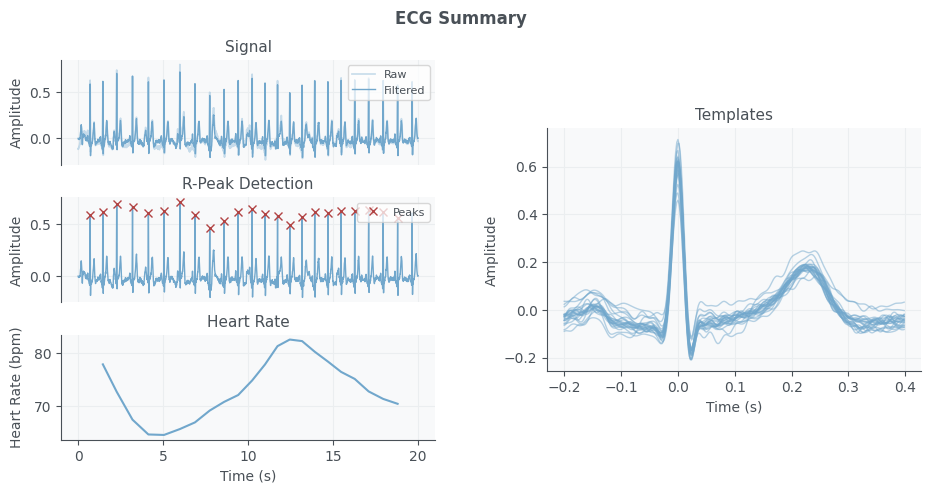

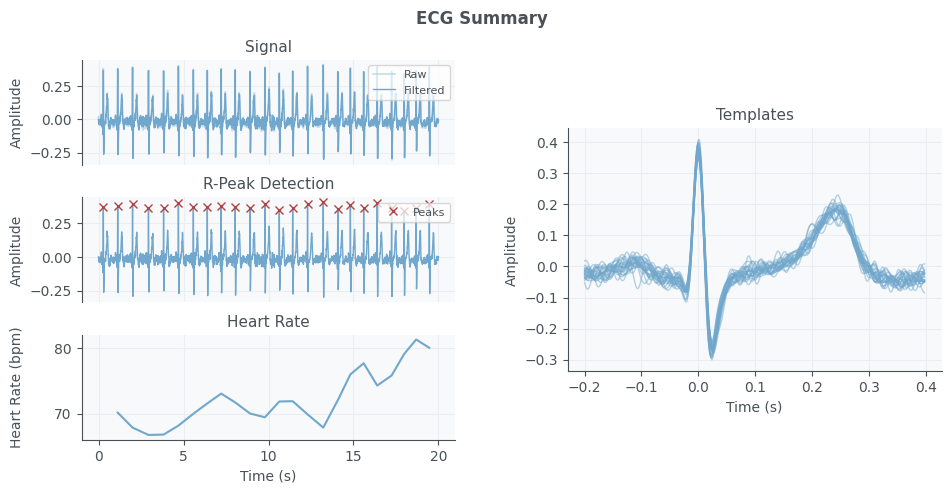

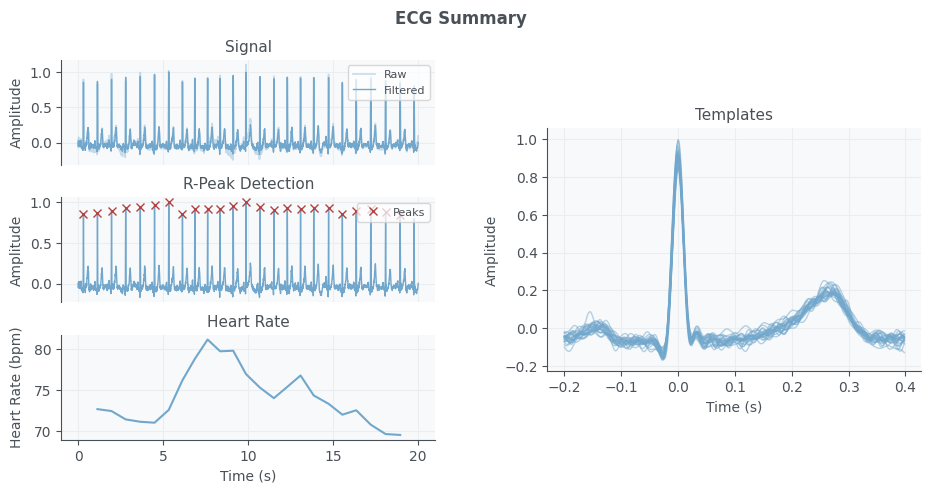

In [3]:
out1 = ecg.ecg(signal=signals1[:,1], sampling_rate=500., show=True)
out2 = ecg.ecg(signal=signals2[:,1], sampling_rate=500., show=True)
out3 = ecg.ecg(signal=signals3[:,1], sampling_rate=500., show=True)

In [4]:
print(out1['templates'])

[[-0.02022842 -0.02289675 -0.02416371 ... -0.05140564 -0.05187815
  -0.05270739]
 [-0.01923816 -0.01627956 -0.01386794 ... -0.04363037 -0.04483597
  -0.04676504]
 [-0.04316915 -0.02803109 -0.01488746 ... -0.06581298 -0.06292192
  -0.05965767]
 ...
 [-0.0222326  -0.02013901 -0.01848674 ... -0.03861439 -0.03932834
  -0.04054226]
 [-0.03053028 -0.02294039 -0.01581144 ... -0.04783852 -0.045955
  -0.04383712]
 [-0.02351528 -0.01683646 -0.01056332 ... -0.02463299 -0.02536573
  -0.0257042 ]]


In [18]:
out1.as_dict()

OrderedDict([('ts',
              array([0.0000e+00, 2.0000e-03, 4.0000e-03, ..., 1.9994e+01, 1.9996e+01,
                     1.9998e+01])),
             ('filtered',
              array([-0.00378831, -0.00693759, -0.00975628, ..., -0.00220936,
                     -0.00212441, -0.00190742])),
             ('rpeaks',
              array([ 352,  727, 1134, 1599, 2066, 2525, 2992, 3436, 3870, 4293, 4707,
                     5118, 5497, 5865, 6225, 6587, 6959, 7347, 7735, 8136, 8545, 8972,
                     9397])),
             ('templates_ts',
              array([-2.00000000e-01, -1.98000000e-01, -1.96000000e-01, -1.94000000e-01,
                     -1.92000000e-01, -1.90000000e-01, -1.88000000e-01, -1.86000000e-01,
                     -1.84000000e-01, -1.82000000e-01, -1.80000000e-01, -1.78000000e-01,
                     -1.76000000e-01, -1.74000000e-01, -1.72000000e-01, -1.70000000e-01,
                     -1.68000000e-01, -1.66000000e-01, -1.64000000e-01, -1.62000000e-01,
 

In [44]:
all_persons = np.vstack((out1['templates'], out2['templates'], out3['templates']))
labels = np.vstack((np.ones((out1['templates'].shape[0], 1)), np.ones((out2['templates'].shape[0], 1))*2., np.ones((out2['templates'].shape[0], 1))*3.))
bin_labels = np.vstack((np.zeros((out1['templates'].shape[0], 1)), np.ones((out2['templates'].shape[0], 1)), np.ones((out2['templates'].shape[0], 1))))

print('All Persons Shape: ', all_persons.shape)
print('Labels Shape: ', labels.shape)
print('Bin Labels Shape: ', bin_labels.shape)

All Persons Shape:  (71, 300)
Labels Shape:  (71, 1)
Bin Labels Shape:  (71, 1)


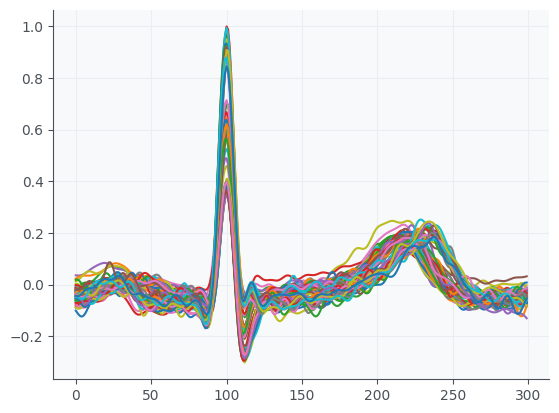

In [24]:
plt.figure()
plt.plot(all_persons.T);

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_persons, labels, test_size=0.33, random_state=42, stratify=labels)

print('X Train Shape: ', X_train.shape)
print('X Test Shape: ', X_test.shape)
print('y Train Shape: ', y_train.shape)
print('y Test Shape: ', y_test.shape)

X Train Shape:  (47, 300)
X Test Shape:  (24, 300)
y Train Shape:  (47, 1)
y Test Shape:  (24, 1)


Distance Matrix Shape:  (47, 24)


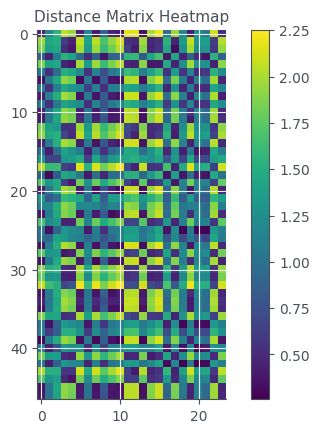

In [33]:
from scipy.spatial.distance import cdist

distance_matrix = cdist(X_train, X_test, metric='euclidean')

print('Distance Matrix Shape: ', distance_matrix.shape)
plt.imshow(distance_matrix)#, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Distance Matrix Heatmap')
plt.show()

In [34]:
y_pred = y_train[np.argmin(distance_matrix, axis=0)]
print(y_pred)

[[2.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [2.]
 [3.]
 [3.]
 [1.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [3.]
 [2.]]


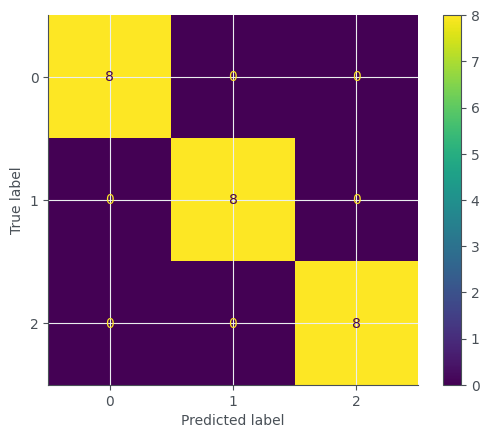

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_persons, bin_labels, test_size=0.33, random_state=42, stratify=labels)

print('X Train Shape: ', X_train.shape)
print('X Test Shape: ', X_test.shape)
print('y Train Shape: ', y_train.shape)
print('y Test Shape: ', y_test.shape)

X Train Shape:  (47, 300)
X Test Shape:  (24, 300)
y Train Shape:  (47, 1)
y Test Shape:  (24, 1)


Distance Matrix Shape:  (47, 24)


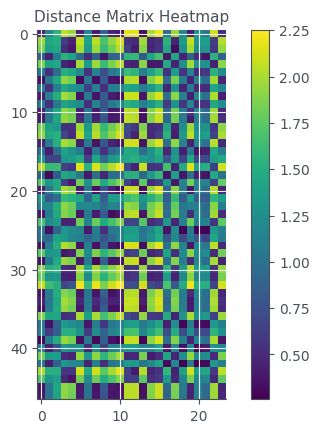

In [46]:
from scipy.spatial.distance import cdist

distance_matrix = cdist(X_train, X_test, metric='euclidean')

print('Distance Matrix Shape: ', distance_matrix.shape)
plt.imshow(distance_matrix)#, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Distance Matrix Heatmap')
plt.show()

In [47]:
y_pred = y_train[np.argmin(distance_matrix, axis=0)]
print(y_pred)

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]


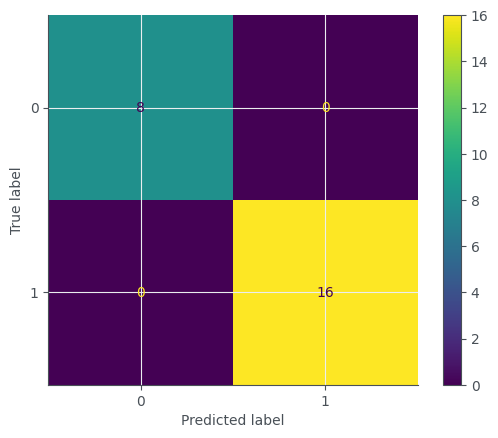

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();
